In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [32]:
type(train)
type(test)

pandas.core.frame.DataFrame

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
train.shape

(891, 12)

In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test.shape

(418, 11)

In [37]:
# train의 칼럼별 결측치 합계
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
# test의 칼럼별 결측치 합계
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [39]:
# 안쓰는 칼럼 삭제
train = train.drop(['Cabin','Embarked','Name','Ticket','PassengerId'], axis=1)
test = test.drop(['Cabin', 'Embarked', 'Name', 'Ticket'],axis=1)

In [40]:
# 비어있거나 잘못된 값인 결측치를 없애준다 (결측치 NA)
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Fare"].fillna(train.groupby("Sex")["Fare"].transform("median"), inplace=True)

In [41]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [42]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [20]:
# 매핑 - 문자열을 가지고 있으면 숫자로 바꿔준다
# sex_mapping = {"male": 0, "female": 1}
# train['Sex'] = train['Sex'].map(sex_mapping)
# test['Sex'] = test['Sex'].map(sex_mapping)
# test['Sex']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Sex, Length: 418, dtype: float64

In [21]:
# 이상치 제거
# 평균 +-3. 표준편차 안에 포함되지 않은 값은 이상치로 생각하여 지움
age_mean = train['Age'].mean()
age_std = train['Age'].std()
indexNames = train[train['Age'] < age_mean - 3*age_std].index
train.drop(indexNames, inplace=True)
indexNames = train[train['Age'] > age_mean - 3*age_std].index
train.drop(indexNames, inplace=True)

In [22]:
from sklearn.linear_model import LogisticRegression
ml = LogisticRegression(solver='lbfgs')

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [43]:
%matplotlib inline
import seaborn as sb
sb.set()

In [53]:
# feature에 따라 죽었는지 살았는지 bar chart 생성
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    print("survived:", survived)
    dead = train[train['Survived']==0][feature].value_counts()
    print("dead:", dead)
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

survived: female    233
male      109
Name: Sex, dtype: int64
dead: male      468
female     81
Name: Sex, dtype: int64


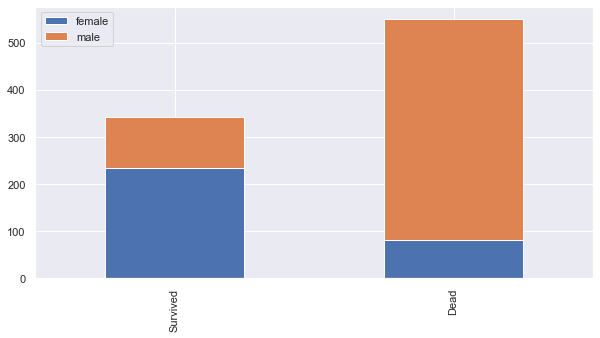

In [54]:
bar_chart('Sex')

survived: 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
dead: 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


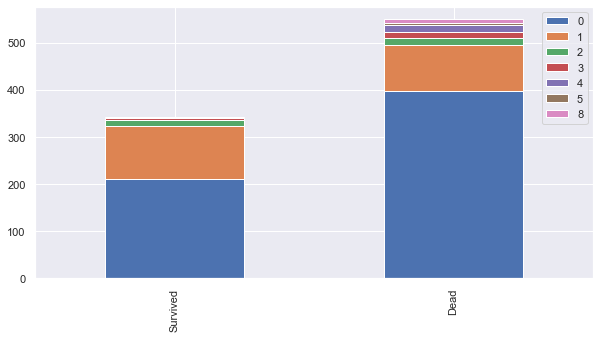

In [55]:
# 가족수에 따라서 생사 여부
bar_chart('SibSp')

survived: 1    136
3    119
2     87
Name: Pclass, dtype: int64
dead: 3    372
2     97
1     80
Name: Pclass, dtype: int64


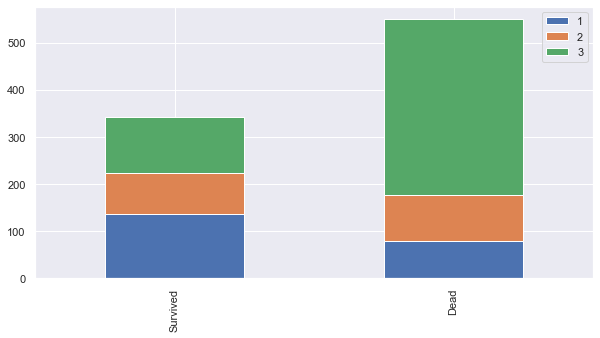

In [56]:
# 클래스에 따라서 생존여부
bar_chart('Pclass')

In [60]:
# crosstab을 이용해서 (x,y)에 컬럼을 넣어준다.
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [61]:
mapping = {
    "female": 1,
    "male": 2
}